In [147]:
import networkx as nx
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [148]:
def random_state():
    return 2*((np.random.random(N) > 0.5).astype('float') - 0.5)

In [149]:
def cost(J, x):
    return (x.T @ J @ x)/N**1.5

In [150]:
def local_search(J, f, x):
    best = f(J, x)
    loops = 0
#     print('-')
#     print('start cost:', best)
    while True:
#         if loops % 20 == 0:
#             print('loop', loops, 'cost:', best)
        bestpos = None
        for i in range(N):
            x[i] *= -1
            newcost = f(J, x)
            if newcost < best:
                best = newcost
                bestpos = i
            x[i] *= -1
        if bestpos == None:
            break
        x[bestpos] *= -1
        loops += 1
#     print('final cost:', best)
    return x, best

In [151]:
N = 10
J = np.random.normal(size=(N,N))

In [152]:
x = random_state()
x, best = local_search(J, cost, x)

Using a bounded alternative function, $K' = tanh$. The strategy is to local search, then use tanh just below that area.



In [153]:
# integral of tanh is ln (cosh (x))
def make_g(f, transition):
    return lambda J, x: -np.log(np.abs(np.cosh(f(J, x) - transition)))

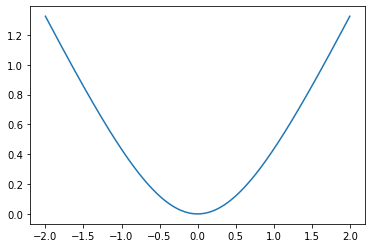

In [154]:
inps = np.linspace(-2, 2, 10000)
plt.plot(inps, np.log(np.abs(np.cosh(inps))))

In [162]:
N = 100
J = np.random.normal(size=(N,N))

x = random_state()
x, best = local_search(J, cost, x)
print(best)
for i in range(20):
    g = make_g(cost, best)
    x, _ = local_search(J, g, x)
    x, test = local_search(J, cost, x)
#     if i % 10 == 0:
    print(best, test)
    if test < best:
        best = test

-0.8477671080131619
-0.8477671080131619 -0.909652158589483
-0.909652158589483 -0.9363392854804173
-0.9363392854804173 -0.907230407719829
-0.9363392854804173 -0.8849140921331543
-0.9363392854804173 -0.9080317436358957
-0.9363392854804173 -0.8814096894586764
-0.9363392854804173 -0.8750117748943175
-0.9363392854804173 -0.9049989993675778
-0.9363392854804173 -0.9117354533259462
-0.9363392854804173 -0.9553459158471563
-0.9553459158471563 -0.9676372215421657
-0.9676372215421657 -0.9085507642731903
-0.9676372215421657 -0.8995293616629373
-0.9676372215421657 -0.9289880596877874
-0.9676372215421657 -0.9947066718788377
-0.9947066718788377 -0.8983112101205976
-0.9947066718788377 -0.8381851592072992
-0.9947066718788377 -0.8981587573415988
-0.9947066718788377 -0.9105452715424938
-0.9947066718788377 -0.9272148296539885


At large N, this should approach the Parisi constant $\sqrt{2} * 0.7632... = 1.079...$

In [158]:
2**0.5 * 0.7632

1.0793277908031462

Things to try: 
* change the width of the tanh function.... or the offset....
* implement the other functions like hBOA or GA ???
* test at small N? or not, it's cool... might want to see if we're getting the right minimum....